# Evaluation of Multi-Tier Framework for measuring access to electricity 

### Importing the useful libraries

In [3051]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
import math

### Importing the dataset

In [3052]:
df = pd.read_csv('Main_dataset.csv')

In [3053]:
df.head()

,Unnamed: 0,HHID,Cluster,strata,Province,District,Sector,Cellule,Village,B1,...,T28,T28B,T28C,DATE_START,TIME_START,DATE_END,TIME_END,cluster,sample_weight,Locality
0,0,1.102021e+12,1,11,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,2.0,...,NaN,NaN,NaN,18/11/2016,12:05,18/11/2016,12:49,11,476.61765,Rural
1,1,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,NaN,NaN,NaN,18/11/2016,10:23,18/11/2016,11:26,12,370.04202,Rural
2,2,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,NaN,NaN,NaN,18/11/2016,11:32,18/11/2016,12:24,12,370.04202,Rural
3,3,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,NaN,NaN,NaN,18/11/2016,10:30,18/11/2016,11:17,12,370.04202,Rural
4,4,1.102021e+12,1,12,City of Kigali,Nyarugenge,Kanyinya,Nzove,Ruyenzi,1.0,...,No,NaN,NaN,18/11/2016,10:14,18/11/2016,11:28,12,370.04202,Rural


### Analysing different Attributes

Attributes which are analysed for MTF_Rwanda_Questionnaire_Household: 

1. Capacity
2. Availability
3. Reliability
4. Quality
5. Affordability
6. Formality
7. Health and safety

### Downloading csv file from dta format

df.to_csv("Main_dataset.csv")

# Attribute: Capacity

To find out the power capacity, we need to know the different sources of power available. From our dataset:
    
1. C22: Power available from the national grid
2. C64: Power available from the mini grid
3. C88: Power available from the generator set
4. C117: Power available from the inverter
5. C119: Power available from the batteries
6. C151: Power available from solar panel (Not present in the dataset but is there in the survey)
7. C154: Power available from solar batteries (Not present in the dataset but is there in the survey)
8. Other source: Pico-Hyro (power capacity question not mentioned in the survey)

In [3054]:
df_analysis= df[['C22', 'C64','C88','C117','C119A']]

In [3055]:
df_analysis.tail()

,C22,C64,C88,C117,C119A
3290,NaN,NaN,NaN,NaN,NaN
3291,4.65,NaN,NaN,NaN,NaN
3292,6.05,NaN,NaN,NaN,NaN
3293,4.65,NaN,NaN,NaN,NaN
3294,NaN,NaN,NaN,NaN,NaN


### Renaming the columns

For a better understanding of the dataset, the columns are named as follows:

1. C22: National_Grid
2. C64: Mini_Grid
3. C88: Generator
4. C117: Inverter
5. C119A: Battery

In [3056]:
df_analysis.columns = ['National_Grid', 'Mini_Grid','Generator','Inverter','Battery']

In [3057]:
df_analysis.tail()

,National_Grid,Mini_Grid,Generator,Inverter,Battery
3290,NaN,NaN,NaN,NaN,NaN
3291,4.65,NaN,NaN,NaN,NaN
3292,6.05,NaN,NaN,NaN,NaN
3293,4.65,NaN,NaN,NaN,NaN
3294,NaN,NaN,NaN,NaN,NaN


In [3058]:
df_analysis.describe()

,National_Grid,Mini_Grid,Generator,Inverter,Battery
count,1478.000000,8.000000,1.0,1.0,4.000000
mean,20.231604,9.883625,12.0,220.0,20.000000
std,30.050734,5.797545,NaN,NaN,33.665016
min,2.000000,4.651000,12.0,220.0,0.000000
25%,4.650000,4.651000,12.0,220.0,0.000000
50%,9.300000,9.302000,12.0,220.0,5.000000
75%,23.260000,11.627750,12.0,220.0,25.000000
max,400.000000,18.605000,12.0,220.0,70.000000


### Disaggregating attribute capacity into "National_Grid" and "Total_capacity"

1. The attribute capacity has been further disaggregated into "National_Grid" and "Total_capacity" to study the dynamics thoroughly.

2. Page 14 of MTF Energy Access Country Diagnostic report confirms that the average monthly household consumption of electricity is 20.8 kWh nationwide, 29.2 kWh in urban areas, and 9.9 kWh in rural areas. This means that the values recorded in the MTF survey for capacity are in kWh.

3. 26.8% of households households have been assessed as having basic access to electricity supply. The remaining 73.2% have no electricity source

## First analysing capacity: "Total_capacity"

Total capacity is the sum of capacities of all the power sources.

In [3059]:
lst=[]
for i in range(df_analysis.shape[0]):
    temp=0
    for j in range(df_analysis.shape[1]):
        if math.isnan(df_analysis.iat[i,j]):
            temp = temp
        else:
            temp = temp + df_analysis.iat[i,j]
    lst.append(temp)

# adding list to dataframe
df_analysis["Total_Capacity"] = lst

In [3060]:
df_analysis.head()

,National_Grid,Mini_Grid,Generator,Inverter,Battery,Total_Capacity
0,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,0.0


### Visualizing the new dataset

In [3061]:
df_total=df_analysis[['Total_Capacity']]

The power capacity units provided in the dataset are in monthly kWh. However, for TIER analysis the units are in daily Wh consumption. Therefore, dividing the dataset by 30 and multiplying it by 1000.

In [3062]:
df_total['Total_Capacity']= df_total.Total_Capacity.apply(lambda x: x if math.isnan(x) else (x*1000)/30)

In [3063]:
df_total.head()

,Total_Capacity
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


### Replacing 0 values again with NaN

In [3064]:
df_total.replace(0, np.nan, inplace=True)

In [3065]:
df_total.head()

,Total_Capacity
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


### Checking for outliers in "Total_Capacity"

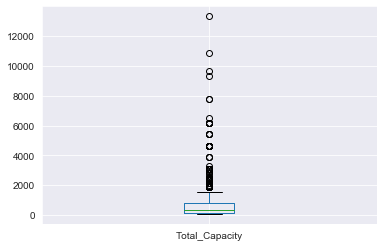

In [3066]:
df_total.boxplot(column='Total_Capacity', return_type='axes')

### Checking the percentage of outliers

In [3067]:
#Outlier treatment for active and reactive power
Q1=df_total.Total_Capacity.quantile(0.25)
Q3=df_total.Total_Capacity.quantile(0.75)

#Calculating inter-quantile range
IQR=Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

df_total["Outliers"] = df_total.Total_Capacity.apply(lambda x: "NaN" if math.isnan(x) else ("True" if x > upper_bound or x < lower_bound else "False"))

In [3068]:
df_total.tail()

,Total_Capacity,Outliers
3290,NaN,NaN
3291,155.000000,False
3292,201.666667,False
3293,155.000000,False
3294,NaN,NaN


In [3069]:
df_total['Outliers'].value_counts()

NaN      1810
False    1376
True      109
Name: Outliers, dtype: int64

Text(0.5, 1.0, 'Percentage of outliers in "Total_Capacity"')

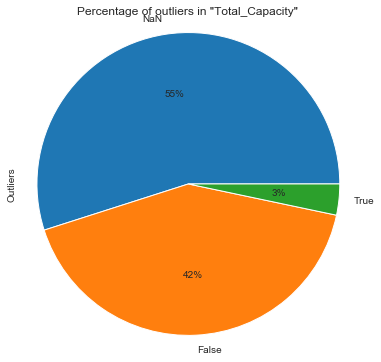

In [3070]:
#Pie plot
df_total.Outliers.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(6,6))
plt.axis('equal')
plt.title('Percentage of outliers in "Total_Capacity"')

From the above Pie chart we can see that there are 3% of outliers present in our dataset

### Removing the outliers

In [3071]:
df_total_cleaned= df_total[df_total.Outliers != 'True']

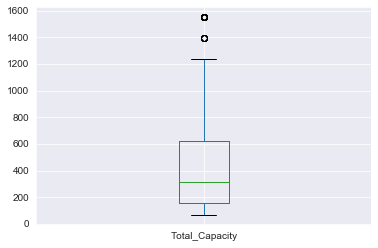

In [3072]:
df_total_cleaned.boxplot(column='Total_Capacity', return_type='axes')

In [3073]:
df_total_cleaned.drop('Outliers', axis=1, inplace=True)

### Replacing NaN values with "Missing_data" 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [3074]:
df_total_cleaned["Total_Capacity"] = df_total_cleaned.Total_Capacity.apply(lambda x: "Missing_data" if math.isnan(x) else x)

In [3075]:
df_total_cleaned.tail()

,Total_Capacity
3290,Missing_data
3291,155
3292,201.667
3293,155
3294,Missing_data


In [3076]:
df_total_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3186 entries, 0 to 3294
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Total_Capacity  3186 non-null   object
dtypes: object(1)
memory usage: 49.8+ KB


### Adding column "TIER" to the dataset 

In [3077]:
def conditions(Total_Capacity):
    if Total_Capacity =='Missing_data':
        return "Missing_data"
    elif Total_Capacity<3:
        return "0"
    elif 3<=Total_Capacity<50:
        return "1"
    elif 50<=Total_Capacity<200:
        return "2"
    elif 200<=Total_Capacity<800:
        return "3"
    elif 800<=Total_Capacity<2000:
        return "4"
    else:
        return "5"
    
func = np.vectorize(conditions)
transform = func(df_total_cleaned.Total_Capacity)
df_total_cleaned["TIER"] = transform

In [3078]:
df_total_cleaned.head()

,Total_Capacity,TIER
0,Missing_data,Missing_data
1,Missing_data,Missing_data
2,Missing_data,Missing_data
3,Missing_data,Missing_data
4,Missing_data,Missing_data


### Printing the TIER counts

In [3079]:
df_total_cleaned['TIER'].value_counts()

Missing_data    1810
3                746
2                451
4                179
Name: TIER, dtype: int64

### Visualizing the TIER levels 

Text(0.5, 1.0, 'TIER levels based on power capacity')

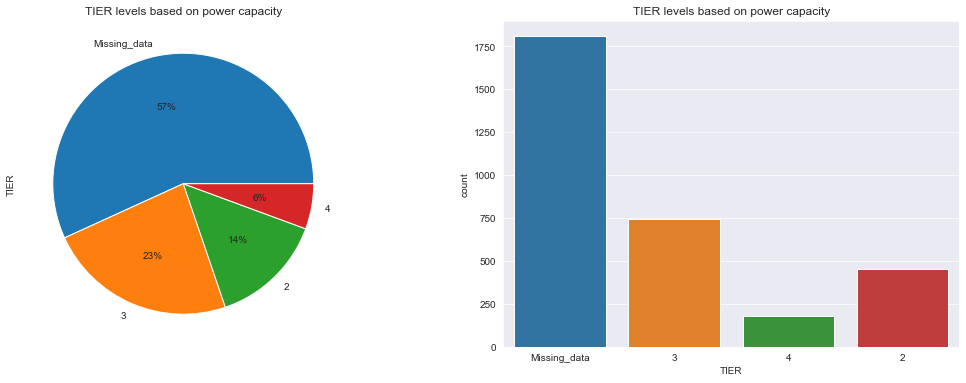

In [3080]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_total_cleaned['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on power capacity')

#Boxplot
sns.countplot('TIER',data=df_total_cleaned,ax=ax[1])
ax[1].set_title('TIER levels based on power capacity')

Page 22 of MTF Energy Access Country Diagnostic report confirms that almost all households in Tier 3 or above are connected to the grid (Maximum percentage of grid connected households lies in TIER 3). Most households in Tier 0 have no access to electricity.

## Now analysing capacity: "National_Grid"

In [3081]:
df_cap=df_analysis[['National_Grid']]

In [3082]:
df_cap.tail()

,National_Grid
3290,NaN
3291,4.65
3292,6.05
3293,4.65
3294,NaN


In [3083]:
df_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   National_Grid  1478 non-null   float64
dtypes: float64(1)
memory usage: 25.9 KB


The power capacity units provided in the dataset are in monthly kWh. However, for TIER analysis the units are in daily Wh consumption. Therefore, dividing the dataset by 30 and multiplying it by 1000.

In [3084]:
df_cap["National_Grid"] = df_cap.National_Grid.apply(lambda x: x if math.isnan(x) else (x*1000)/30)

In [3085]:
df_cap.tail()

,National_Grid
3290,NaN
3291,155.000000
3292,201.666667
3293,155.000000
3294,NaN


In [3086]:
df_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   National_Grid  1478 non-null   float64
dtypes: float64(1)
memory usage: 25.9 KB


### Visualizing the new dataset

In [3087]:
df_cap.describe()

,National_Grid
count,1478.000000
mean,674.386784
std,1001.691143
min,66.666667
25%,155.000000
50%,310.000000
75%,775.333333
max,13333.333333


### Checking for outliers in "National_Grid"

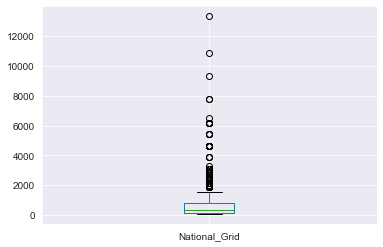

In [3088]:
df_cap.boxplot(column='National_Grid', return_type='axes')

### Checking the percentage of outliers

In [3089]:
#Outlier treatment for active and reactive power
Q1=df_cap.National_Grid.quantile(0.25)
Q3=df_cap.National_Grid.quantile(0.75)

#Calculating inter-quantile range
IQR=Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

df_cap["Outliers"] = df_cap.National_Grid.apply(lambda x: "NaN" if math.isnan(x) else ("True" if x > upper_bound or x < lower_bound else "False"))

In [3090]:
df_cap.tail()

,National_Grid,Outliers
3290,NaN,NaN
3291,155.000000,False
3292,201.666667,False
3293,155.000000,False
3294,NaN,NaN


In [3091]:
df_cap['Outliers'].value_counts()

NaN      1817
False    1370
True      108
Name: Outliers, dtype: int64

Text(0.5, 1.0, 'Percentage of outliers in "National_Grid"')

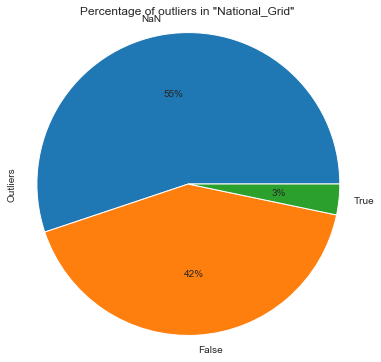

In [3092]:
#Pie plot
df_cap.Outliers.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(6,6))
plt.axis('equal')
plt.title('Percentage of outliers in "National_Grid"')

From the above Pie chart we can see that there are 3% of outliers present in our dataset

### Removing the outliers

In [3093]:
df_cap_cleaned= df_cap[df_cap.Outliers != 'True']

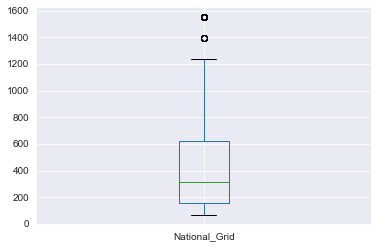

In [3094]:
df_cap_cleaned.boxplot(column='National_Grid', return_type='axes')

### Replacing NaN values with "Missing_data" 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [3095]:
df_cap_cleaned.drop('Outliers', axis=1, inplace=True)

In [3096]:
df_cap_cleaned["National_Grid"] = df_cap_cleaned.National_Grid.apply(lambda x: "Missing_data" if math.isnan(x) else x)

In [3097]:
df_cap_cleaned.head()

,National_Grid
0,Missing_data
1,Missing_data
2,Missing_data
3,Missing_data
4,Missing_data


In [3098]:
df_cap_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3187 entries, 0 to 3294
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   National_Grid  3187 non-null   object
dtypes: object(1)
memory usage: 49.8+ KB


### Adding column "TIER" to the dataset 

In [3099]:
def conditions(National_Grid):
    if National_Grid =='Missing_data':
        return "Missing_data"
    elif National_Grid<3:
        return "0"
    elif 3<=National_Grid<50:
        return "1"
    elif 50<=National_Grid<200:
        return "2"
    elif 200<=National_Grid<800:
        return "3"
    elif 800<=National_Grid<2000:
        return "4"
    else:
        return "5"
    
func = np.vectorize(conditions)
transform = func(df_cap_cleaned.National_Grid)
df_cap_cleaned["TIER"] = transform

In [3100]:
df_cap_cleaned.head()

,National_Grid,TIER
0,Missing_data,Missing_data
1,Missing_data,Missing_data
2,Missing_data,Missing_data
3,Missing_data,Missing_data
4,Missing_data,Missing_data


### Printing the TIER counts

In [3101]:
df_cap_cleaned['TIER'].value_counts()

Missing_data    1817
3                743
2                450
4                177
Name: TIER, dtype: int64

### Visualizing the TIER levels 

Text(0.5, 1.0, 'TIER levels based on power capacity')

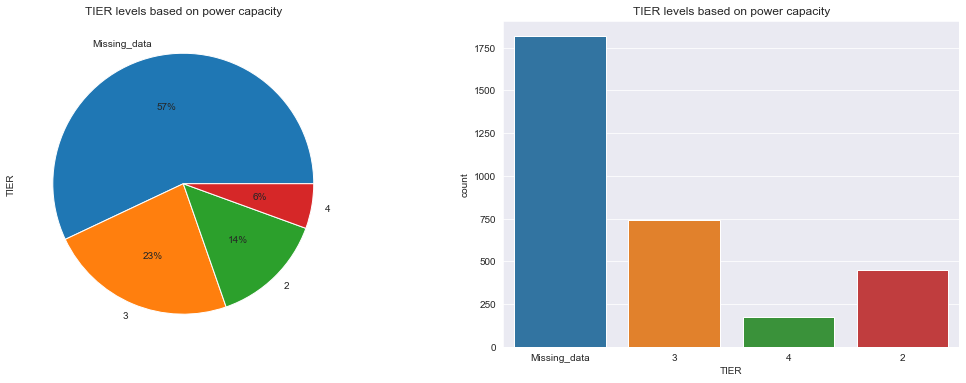

In [3102]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_cap_cleaned['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on power capacity')

#Barplot
sns.countplot('TIER',data=df_cap_cleaned,ax=ax[1])
ax[1].set_title('TIER levels based on power capacity')

Page 22 of MTF Energy Access Country Diagnostic report confirms that almost all households in Tier 3 or above are connected to the grid (Maximum percentage of grid connected households lies in TIER 3). Most households in Tier 0 have no access to electricity.

# Attribute: Availabilty

## Availability: Day and night

Methodology:

To understand the attribute more carefully, features from every power souce have been taekn into consideration; 

* C26A represents the hours of electricity available each day and night from the national grid in the worst months. 
* Whereas, C26B represents the hours of electricity available each day and night from  the national grid in the typical months.
* C68A represents the hours of electricity available each day and night from the mini grid in the worst months.
* Whereas, C68B represents the hours of electricity available each day and night from  the mini grid in the typical months.
* C107A represents the hours of electricity available each day and night from the generator set in the worst months.
* Whereas, C107B represents the hours of electricity available each day and night from  the generator set in the typical months.
* C127 represents the hours of electricity available each day from the rechargeable battery.
* C137A represents the hours of electricity available each day and night from pico-hydro in the worst months.
* Whereas, C137B represents the hours of electricity available each day and night from  pico-hydro in the typical months.
* C172A represents the hours of electricity available each day and night from  main solar based devices in the worst months.
* Whereas, C172B represents the hours of electricity available each day and night from  main solar based devices in the typical months.

In [3103]:
df_av= df[['C26A','C26B','C68A','C68B','C107A','C107B','C127','C137A','C137B','C172A','C172B']]

### Renaming the columns

In [3104]:
df_av.columns = ['National_grid_Worst', 'National_grid_Typical','Mini_grid_Worst','Mini_grid_Typical','Generator_set_Worst','Generator_set_Typical','Battery','Pico_hydro_Worst','Pico_hydro_Typical','Solar_device_Worst','Solar_device_Typical']

In [3105]:
df_av.tail()

,National_grid_Worst,National_grid_Typical,Mini_grid_Worst,Mini_grid_Typical,Generator_set_Worst,Generator_set_Typical,Battery,Pico_hydro_Worst,Pico_hydro_Typical,Solar_device_Worst,Solar_device_Typical
3290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3
3291,13.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3292,19.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3293,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3106]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   National_grid_Worst    652 non-null    object 
 1   National_grid_Typical  1591 non-null   object 
 2   Mini_grid_Worst        2 non-null      float64
 3   Mini_grid_Typical      8 non-null      float64
 4   Generator_set_Worst    1 non-null      float64
 5   Generator_set_Typical  1 non-null      float64
 6   Battery                4 non-null      float64
 7   Pico_hydro_Worst       3 non-null      object 
 8   Pico_hydro_Typical     5 non-null      object 
 9   Solar_device_Worst     39 non-null     float64
 10  Solar_device_Typical   109 non-null    object 
dtypes: float64(6), object(5)
memory usage: 283.3+ KB


### Calculation

In this step Total availabilty for all the power sources has been analysed. Taking the worst months into consideration, the missing values in "worst" months have been added from the "typical" months. This is done as the World bank takes the worst condition into account for enery access assessment.

In [3107]:
#National Grid
df_av['National_grid_Total'] = df_av.National_grid_Worst.fillna(value=df_av.National_grid_Typical)

#National Grid
df_av['Mini_grid_Total'] = df_av.Mini_grid_Worst.fillna(value=df_av.Mini_grid_Typical)

#Generator Set
df_av['Generator_set_Total'] = df_av.Generator_set_Worst.fillna(value=df_av.Generator_set_Typical)

#Pico Hydro
df_av['Pico_hydro_Total'] = df_av.Pico_hydro_Worst.fillna(value=df_av.Pico_hydro_Typical)

#Solar Devicce
df_av['Solar_device_Total'] = df_av.Solar_device_Worst.fillna(value=df_av.Solar_device_Typical)


#Taking only the total values into consideration
df_av_new=df_av[['National_grid_Total','Mini_grid_Total','Generator_set_Total','Pico_hydro_Total','Solar_device_Total','Battery']]

In [3108]:
df_av_new.tail()

,National_grid_Total,Mini_grid_Total,Generator_set_Total,Pico_hydro_Total,Solar_device_Total,Battery
3290,NaN,NaN,NaN,NaN,1,NaN
3291,13.0,NaN,NaN,NaN,NaN,NaN
3292,19.0,NaN,NaN,NaN,NaN,NaN
3293,23.0,NaN,NaN,NaN,NaN,NaN
3294,NaN,NaN,NaN,NaN,NaN,NaN


### Changing the string variables into float/int 

In [3109]:
df_av_new=df_av_new.replace(to_replace="Don't know",value=0)

In [3110]:
df_av_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   National_grid_Total  1591 non-null   object 
 1   Mini_grid_Total      8 non-null      float64
 2   Generator_set_Total  1 non-null      float64
 3   Pico_hydro_Total     5 non-null      float64
 4   Solar_device_Total   110 non-null    object 
 5   Battery              4 non-null      float64
dtypes: float64(4), object(2)
memory usage: 154.6+ KB


In [3111]:
df_av_new= df_av_new.apply(pd.to_numeric, errors='coerce')

In [3112]:
df_av_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   National_grid_Total  1591 non-null   float64
 1   Mini_grid_Total      8 non-null      float64
 2   Generator_set_Total  1 non-null      float64
 3   Pico_hydro_Total     5 non-null      float64
 4   Solar_device_Total   110 non-null    float64
 5   Battery              4 non-null      float64
dtypes: float64(6)
memory usage: 154.6 KB


### Calculating the total availability

In [3113]:
lst=[]
for i in range(df_av_new.shape[0]):
    temp=0
    for j in range(df_av_new.shape[1]):
        if math.isnan(df_av_new.iat[i,j]):
            temp = temp
        else:
            temp = temp + df_av_new.iat[i,j]
    lst.append(temp)

# adding list to dataframe
df_av_new["Total_availability"] = lst

In [3114]:
df_av_new.tail()

,National_grid_Total,Mini_grid_Total,Generator_set_Total,Pico_hydro_Total,Solar_device_Total,Battery,Total_availability
3290,NaN,NaN,NaN,NaN,1.0,NaN,1.0
3291,13.0,NaN,NaN,NaN,NaN,NaN,13.0
3292,19.0,NaN,NaN,NaN,NaN,NaN,19.0
3293,23.0,NaN,NaN,NaN,NaN,NaN,23.0
3294,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [3115]:
df_av_new=df_av_new[['Total_availability']]

### Replacing NaN and "Don't know" values with "Missing_data" 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [3116]:
df_av_new['Total_availability'] = df_av_new.replace(np.nan, 'Missing_data', regex=True)

In [3117]:
df_av_new.tail()

,Total_availability
3290,1.0
3291,13.0
3292,19.0
3293,23.0
3294,0.0


### Adding column "TIER" to the dataset 

In [3118]:
# AVAILABILITY: Day
#Note: conditions for TIER 1 and 2 are the same

def conditions(Total_availability):
    if Total_availability == 'Missing_data':
        return "Missing_data"
    elif Total_availability==0:
        return "Missing_data"
    elif 0<Total_availability<4:
        return "0"
    elif 4<=Total_availability<8:
        return "1&2"
    elif 8<=Total_availability<16:
        return "3"
    elif 16<=Total_availability<23:
        return "4"
    else:
        return "5"
    
func = np.vectorize(conditions)
transform = func(df_av_new.Total_availability)
df_av_new["TIER"] = transform

In [3119]:
df_av_new.tail()

,Total_availability,TIER
3290,1.0,0
3291,13.0,3
3292,19.0,4
3293,23.0,5
3294,0.0,Missing_data


In [3120]:
df_av_new['TIER'].value_counts()

Missing_data    1792
4                590
5                504
3                210
1&2              102
0                 97
Name: TIER, dtype: int64

### Visualizing the TIER levels 

Text(0.5, 1.0, 'TIER levels based on day and night power availability')

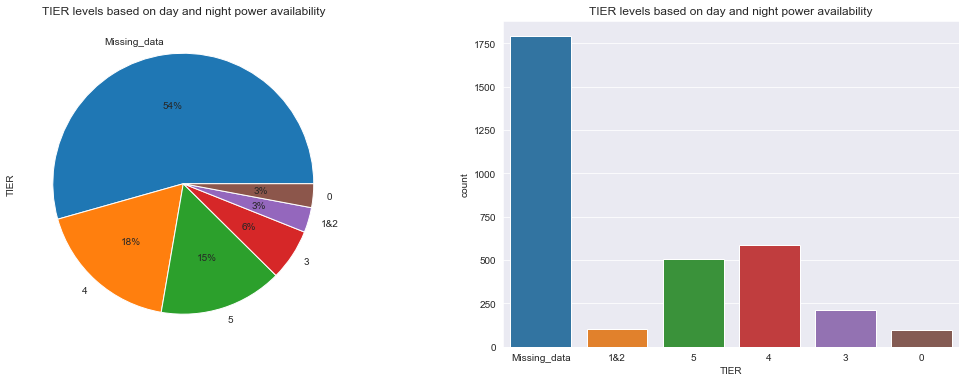

In [3121]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_av_new['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on day and night power availability')

#Barplot
sns.countplot('TIER',data=df_av_new,ax=ax[1])
ax[1].set_title('TIER levels based on day and night power availability')

In the above graph we can see that the daily availability in:

1. TIER 0 contributes to 4% of evening availability which is less than 4 hours
2. TIER 1&2 contributes to 8% of evening availability which is at least 4 hours
3. TIER 3 contributes to 12% of evening availability which is at least 8 hours
4. TIER 4 contributes to 24% of evening availability which is at least 16 hours
4. TIER 5 contributes to 24% of evening availability which is at least 23 hours

## Attribute: Availabilty (Evening)

Methodology:

To understand the attribute more carefully, features from every power souce have been taekn into consideration; 

* C27A represents the hours of electricity available each evening from the national grid in the worst months. 
* Whereas, C27B represents the hours of electricity available each evening from  the national grid in the typical months.
* C69A represents the hours of electricity available each evening from the mini grid in the worst months.
* Whereas, C69B represents the hours of electricity available each evening from  the mini grid in the typical months.
* C108A represents the hours of electricity available each evening from the generator set in the worst months.
* Whereas, C108B represents the hours of electricity available each evening from  the generator set in the typical months.
* C138A represents the hours of electricity available each evening from pico-hydro in the worst months.
* Whereas, C138B represents the hours of electricity available each evening from  pico-hydro in the typical months.
* C173A represents the hours of electricity available each evening from main solar based devices in the worst months.
* Whereas, C173B represents the hours of electricity available each evening from  main solar based devices in the typical months.

In [3122]:
df_ave= df[['C27A','C27B','C69A','C69B','C108A','C108B','C138A','C138B','C173A','C173B']]

### Renaming the columns

In [3123]:
df_ave.columns = ['National_grid_Worst', 'National_grid_Typical','Mini_grid_Worst','Mini_grid_Typical','Generator_set_Worst','Generator_set_Typical','Pico_hydro_Worst','Pico_hydro_Typical','Solar_device_Worst','Solar_device_Typical']

In [3124]:
df_ave.tail()

,National_grid_Worst,National_grid_Typical,Mini_grid_Worst,Mini_grid_Typical,Generator_set_Worst,Generator_set_Typical,Pico_hydro_Worst,Pico_hydro_Typical,Solar_device_Worst,Solar_device_Typical
3290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3
3291,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3292,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3293,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3125]:
df_ave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   National_grid_Worst    652 non-null    object 
 1   National_grid_Typical  1591 non-null   object 
 2   Mini_grid_Worst        2 non-null      float64
 3   Mini_grid_Typical      8 non-null      float64
 4   Generator_set_Worst    1 non-null      float64
 5   Generator_set_Typical  1 non-null      float64
 6   Pico_hydro_Worst       3 non-null      float64
 7   Pico_hydro_Typical     5 non-null      float64
 8   Solar_device_Worst     39 non-null     float64
 9   Solar_device_Typical   109 non-null    object 
dtypes: float64(7), object(3)
memory usage: 257.5+ KB


### Calculation

In this step Total availabilty for all the power sources has been analysed. Taking the worst months into consideration, the missing values in "worst" months have been added from the "typical" months. This is done as the World bank takes the worst condition into account for enery access assessment.

In [3126]:
#National Grid
df_ave['National_grid_Total'] = df_ave.National_grid_Worst.fillna(value=df_ave.National_grid_Typical)

#National Grid
df_ave['Mini_grid_Total'] = df_ave.Mini_grid_Worst.fillna(value=df_ave.Mini_grid_Typical)

#Generator Set
df_ave['Generator_set_Total'] = df_ave.Generator_set_Worst.fillna(value=df_ave.Generator_set_Typical)

#Pico Hydro
df_ave['Pico_hydro_Total'] = df_ave.Pico_hydro_Worst.fillna(value=df_ave.Pico_hydro_Typical)

#Solar Devicce
df_ave['Solar_device_Total'] = df_ave.Solar_device_Worst.fillna(value=df_ave.Solar_device_Typical)


#Taking only the total values into consideration
df_ave_new=df_ave[['National_grid_Total','Mini_grid_Total','Generator_set_Total','Pico_hydro_Total','Solar_device_Total']]

In [3127]:
df_ave_new.tail()

,National_grid_Total,Mini_grid_Total,Generator_set_Total,Pico_hydro_Total,Solar_device_Total
3290,NaN,NaN,NaN,NaN,1
3291,2.0,NaN,NaN,NaN,NaN
3292,1.0,NaN,NaN,NaN,NaN
3293,4.0,NaN,NaN,NaN,NaN
3294,NaN,NaN,NaN,NaN,NaN


### Changing the string variables into float/int 

In [3128]:
df_ave_new=df_ave_new.replace(to_replace="Don't know",value=0)

In [3129]:
df_ave_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   National_grid_Total  1591 non-null   object 
 1   Mini_grid_Total      8 non-null      float64
 2   Generator_set_Total  1 non-null      float64
 3   Pico_hydro_Total     5 non-null      float64
 4   Solar_device_Total   110 non-null    object 
dtypes: float64(3), object(2)
memory usage: 128.8+ KB


In [3130]:
df_ave_new= df_ave_new.apply(pd.to_numeric, errors='coerce')

In [3131]:
df_ave_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   National_grid_Total  1591 non-null   float64
 1   Mini_grid_Total      8 non-null      float64
 2   Generator_set_Total  1 non-null      float64
 3   Pico_hydro_Total     5 non-null      float64
 4   Solar_device_Total   110 non-null    float64
dtypes: float64(5)
memory usage: 128.8 KB


### Calculating the total availability

In [3132]:
lst=[]
for i in range(df_ave_new.shape[0]):
    temp=0
    for j in range(df_ave_new.shape[1]):
        if math.isnan(df_ave_new.iat[i,j]):
            temp = temp
        else:
            temp = temp + df_ave_new.iat[i,j]
    lst.append(temp)

# adding list to dataframe
df_ave_new["Total_availability"] = lst

In [3133]:
df_ave_new.tail()

,National_grid_Total,Mini_grid_Total,Generator_set_Total,Pico_hydro_Total,Solar_device_Total,Total_availability
3290,NaN,NaN,NaN,NaN,1.0,1.0
3291,2.0,NaN,NaN,NaN,NaN,2.0
3292,1.0,NaN,NaN,NaN,NaN,1.0
3293,4.0,NaN,NaN,NaN,NaN,4.0
3294,NaN,NaN,NaN,NaN,NaN,0.0


In [3134]:
df_ave_new=df_ave_new[['Total_availability']]

### Replacing NaN values with "Missing_data" 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [3135]:
df_ave_new['Total_availability'] = df_ave_new.replace(np.nan, 'Missing_data', regex=True)

In [3136]:
df_ave_new.tail()

,Total_availability
3290,1.0
3291,2.0
3292,1.0
3293,4.0
3294,0.0


### Adding column "TIER" to the dataset 

In [3137]:
# AVAILABILITY: Day
#Note: conditions for TIER 4 and 5 are the same

def conditions(Total_availability):
    if Total_availability == 'Missing_data':
        return "Missing_data"
    elif Total_availability==0:
        return "Missing_data"
    elif 0<Total_availability<1:
        return "0"
    elif 1<=Total_availability<2:
        return "1"
    elif 2<=Total_availability<3:
        return "2"
    elif 3<=Total_availability<4:
        return "3"
    else:
        return "4&5"
    
func = np.vectorize(conditions)
transform = func(df_ave_new.Total_availability)
df_ave_new["TIER"] = transform

In [3138]:
df_ave_new.tail()

,Total_availability,TIER
3290,1.0,1
3291,2.0,2
3292,1.0,1
3293,4.0,4&5
3294,0.0,Missing_data


In [3139]:
df_ave_new['TIER'].value_counts()

Missing_data    1698
4&5              804
3                408
2                248
1                137
Name: TIER, dtype: int64

### Visualizing the TIER levels 

Text(0.5, 1.0, 'TIER levels based on evening power availability')

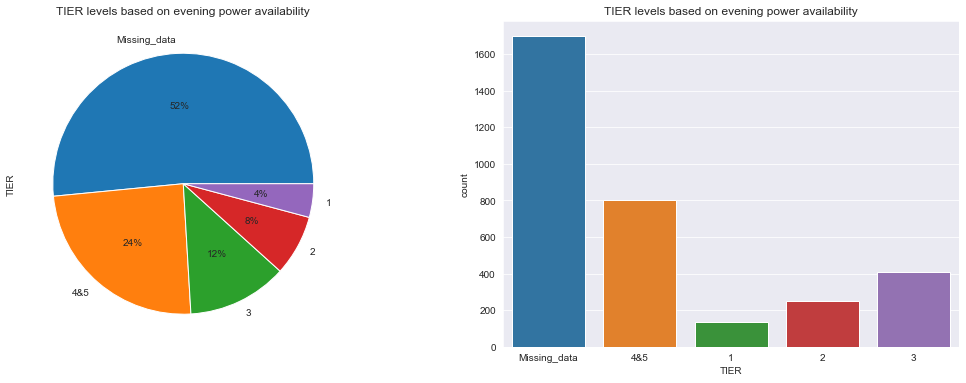

In [3140]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_ave_new['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on evening power availability')

#Barplot
sns.countplot('TIER',data=df_ave_new,ax=ax[1])
ax[1].set_title('TIER levels based on evening power availability')

In the above graph we can see that the evening availability in:

1. TIER 1 contributes to 4% of evening availability which is at least 1 hours
2. TIER 2 contributes to 8% of evening availability which is at least 2 hours
3. TIER 3 contributes to 12% of evening availability which is at least 3 hours
4. TIER 4&5 contributes to 24% of evening availability which is at least 4 hours

# Attribute: Reliability

Methodology:

To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 
* C29A represents the electricity disruption from the national grid in the worst months. 
* Whereas, C29B represents the electricity disruption from the national grid in the actual months.
* C71A represents the electricity disruption from the mini grid in the worst months. 
* Whereas, C71B represents the electricity disruption from the mini grid in the actual months.

In [3141]:
df_rel= df[['C29A','C29B','C71A','C71B']]

### Renaming the columns

In [3142]:
df_rel.columns = ['National_grid_Worst','National_grid_Typical','Mini_grid_Worst','Mini_grid_Typical']

In [3143]:
df_rel.tail()

,National_grid_Worst,National_grid_Typical,Mini_grid_Worst,Mini_grid_Typical
3290,NaN,NaN,NaN,NaN
3291,3.0,1.0,NaN,NaN
3292,1.0,Don't know,NaN,NaN
3293,NaN,2.0,NaN,NaN
3294,NaN,NaN,NaN,NaN


In [3144]:
df_rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   National_grid_Worst    652 non-null    object 
 1   National_grid_Typical  1591 non-null   object 
 2   Mini_grid_Worst        2 non-null      float64
 3   Mini_grid_Typical      8 non-null      object 
dtypes: float64(1), object(3)
memory usage: 103.1+ KB


### Calculation

In this step Total reliability from all the power sources has been analysed. Taking the worst months into consideration, the missing values in "worst" months have been added from the "typical" months. This is done as the World bank takes the worst condition into account for enery access assessment.

In [3145]:
#National Grid
df_rel['National_grid_Total'] = df_rel.National_grid_Worst.fillna(value=df_rel.National_grid_Typical)

#National Grid
df_rel['Mini_grid_Total'] = df_rel.Mini_grid_Worst.fillna(value=df_rel.Mini_grid_Typical)

#Taking only the total values into consideration
df_rel_new=df_rel[['National_grid_Total','Mini_grid_Total']]

In [3146]:
df_rel_new.tail()

,National_grid_Total,Mini_grid_Total
3290,NaN,NaN
3291,3.0,NaN
3292,1.0,NaN
3293,2.0,NaN
3294,NaN,NaN


### Changing the string variables into float/int 

In [3147]:
df_rel_new=df_rel_new.replace(to_replace="Don't know",value=0)

In [3148]:
df_rel_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   National_grid_Total  1591 non-null   object
 1   Mini_grid_Total      8 non-null      object
dtypes: object(2)
memory usage: 51.6+ KB


In [3149]:
df_rel_new= df_rel_new.apply(pd.to_numeric, errors='coerce')

In [3150]:
df_rel_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   National_grid_Total  1591 non-null   float64
 1   Mini_grid_Total      8 non-null      float64
dtypes: float64(2)
memory usage: 51.6 KB


### Calculating the total availability

In [3151]:
lst=[]
for i in range(df_rel_new.shape[0]):
    temp=0
    for j in range(df_rel_new.shape[1]):
        if math.isnan(df_rel_new.iat[i,j]):
            temp = temp
        else:
            temp = temp + df_rel_new.iat[i,j]
    lst.append(temp)

# adding list to dataframe
df_rel_new["Total_reliability"] = lst

In [3152]:
df_rel_new.tail()

,National_grid_Total,Mini_grid_Total,Total_reliability
3290,NaN,NaN,0.0
3291,3.0,NaN,3.0
3292,1.0,NaN,1.0
3293,2.0,NaN,2.0
3294,NaN,NaN,0.0


In [3153]:
df_rel_new=df_rel_new[['Total_reliability']]

### Replacing NaN values with "Missing_data" 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [3154]:
df_rel_new['Total_reliability'] = df_rel_new.replace(np.nan, 'Missing_data', regex=True)

In [3155]:
df_rel_new.tail()

,Total_reliability
3290,0.0
3291,3.0
3292,1.0
3293,2.0
3294,0.0


### Adding column "TIER" to the dataset 

In [3156]:
# AVAILABILITY: Day
#Note: conditions for TIER 3 and 4 are the same and for TIER 0,1 and 2 are the same

def conditions(Total_reliability):
    if Total_reliability == 'Missing_data':
        return "Missing_data"
    elif Total_reliability==0:
        return "Missing_data"
    elif 0<Total_reliability<=3:
        return "5"
    elif 3<Total_reliability<=14:
        return "3&4"
    else:
        return "0,1&2"
    
func = np.vectorize(conditions)
transform = func(df_rel_new.Total_reliability)
df_rel_new["TIER"] = transform

In [3157]:
df_rel_new.tail()

,Total_reliability,TIER
3290,0.0,Missing_data
3291,3.0,5
3292,1.0,5
3293,2.0,5
3294,0.0,Missing_data


In [3158]:
df_rel_new['TIER'].value_counts()

Missing_data    1967
5               1202
3&4              126
Name: TIER, dtype: int64

### Visualizing the TIER levels 

Text(0.5, 1.0, 'TIER levels based on reliability')

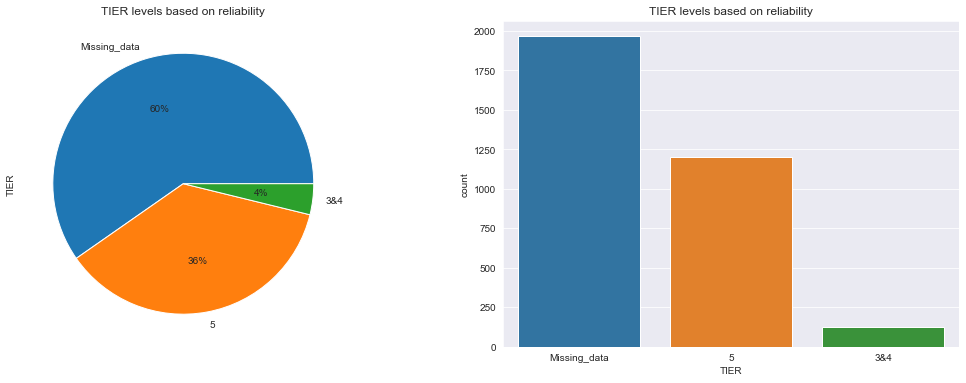

In [3159]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_rel_new['TIER'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on reliability')

#Barplot
sns.countplot('TIER',data=df_rel_new,ax=ax[1])
ax[1].set_title('TIER levels based on reliability')

In the above graph we can see:

1. TIER 5 contributes to 36% of disruptions which is at most 3 disruptions per week with total duration of less than 2 hours
2. TIER 3 & 4 contributes to 4% of disruptions which is at most 14 disruptions per week and more than 3 disruptions per week with total duration of more than 2 hours

# Attribute: Quality

Methodology:

To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 

* C39 represents the damaged appliances from the national grid. 
* C81 represents the damaged appliances from the mini grid.
* C110 represents the damaged appliances from the generator set.
* C140 represents the damaged appliances from the Pico-hydro.

In [3160]:
df_q= df[['C39','C81','C110','C140']]

### Renaming the columns

In [3161]:
df_q.columns = ['National_grid', 'Mini_grid','Generator_set','Pico_hydro']

In [3162]:
df_q.tail()

,National_grid,Mini_grid,Generator_set,Pico_hydro
3290,NaN,NaN,NaN,NaN
3291,Yes,NaN,NaN,NaN
3292,No,NaN,NaN,NaN
3293,No,NaN,NaN,NaN
3294,NaN,NaN,NaN,NaN


In [3163]:
df_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   National_grid  1591 non-null   object
 1   Mini_grid      8 non-null      object
 2   Generator_set  1 non-null      object
 3   Pico_hydro     5 non-null      object
dtypes: object(4)
memory usage: 103.1+ KB


### Changing the string variables into float/int 

In [3164]:
df_q=df_q.replace(to_replace="Don?t know",value='Missing_data')

In [3165]:
df_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3295 entries, 0 to 3294
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   National_grid  1591 non-null   object
 1   Mini_grid      8 non-null      object
 2   Generator_set  1 non-null      object
 3   Pico_hydro     5 non-null      object
dtypes: object(4)
memory usage: 103.1+ KB


### Replacing NaN values with "Missing_data" 

This is done to keep the missing values into analysis (As it is important to know how many missing values do we have)

In [3166]:
df_q = df_q.replace(np.nan, 'Missing_data', regex=True)

In [3167]:
df_q.tail()

,National_grid,Mini_grid,Generator_set,Pico_hydro
3290,Missing_data,Missing_data,Missing_data,Missing_data
3291,Yes,Missing_data,Missing_data,Missing_data
3292,No,Missing_data,Missing_data,Missing_data
3293,No,Missing_data,Missing_data,Missing_data
3294,Missing_data,Missing_data,Missing_data,Missing_data


### Visualizing the TIER levels 

#### Products damaged by National grid

Text(0.5, 1.0, 'TIER levels based on reliability')

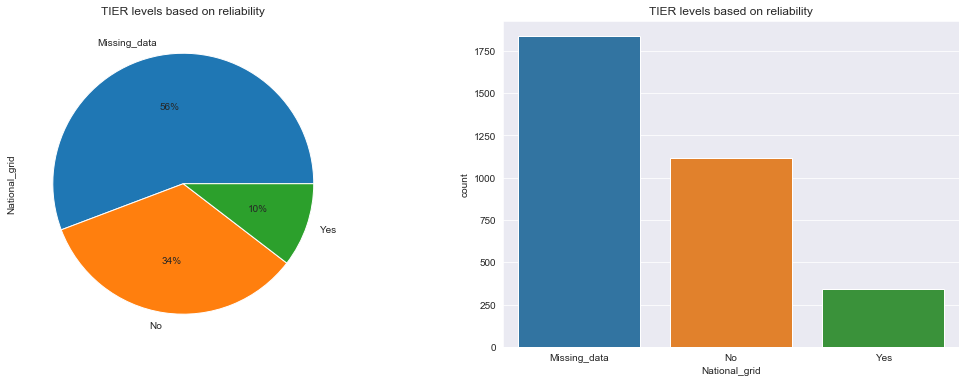

In [3180]:
#Pie plot
f,ax=plt.subplots(1,2, figsize=(18,6))
df_q['National_grid'].value_counts().plot.pie( autopct='%1.0f%%',ax=ax[0])
ax[0].set_title('TIER levels based on reliability')

#Barplot
sns.countplot('National_grid',data=df_q,ax=ax[1])
ax[1].set_title('TIER levels based on reliability')

# Attribute: Affordability 


# Attribute: Formality

Methodology:

To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 

* C17 represents the electricity bill payment for using the national grid. 
* C57 represents the electricity bill payment for using the mini grid.

In [3184]:
df_f= df[['C17','C57']]

### Renaming the columns

In [3185]:
df_f.columns = ['National_grid', 'Mini_grid']

In [3186]:
df_f.head()

,National_grid,Mini_grid
0,Pay based on lights and appliances used,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


### Replacing NaN values with "Missing_data"

In [3187]:
df_f = df_f.replace(np.nan, 'Missing_data', regex=True)

In [3189]:
df_f['National_grid'].value_counts()

Missing_data                               1663
Pre-paid                                   1400
Fixed monthly fee                           109
Pay based on lights and appliances used      41
No bill for electricity                      32
Other                                        24
Monthly bill                                 14
We never used electricity                    10
Utility estimates consumption                 2
Name: National_grid, dtype: int64

In [3190]:
df_f['Mini_grid'].value_counts()

Missing_data                               3289
Fixed monthly fee                             2
No bill for electricity                       2
Pay based on lights and appliances used       1
Other                                         1
Name: Mini_grid, dtype: int64

### Focusing on National grid

In [3192]:
def conditions(National_grid):
    if National_grid == 'Missing_data':
        return "Missing_data"
    elif National_grid=='No bill for electricity' or National_grid=='We never used electricity':
        return "No bill paid for electricity"
    else:
        return "Bill paid for electricity"
    
func = np.vectorize(conditions)
transform = func(df_f.National_grid)
df_f["TIER"] = transform

In [3193]:
df_f.head()

,National_grid,Mini_grid,TIER
0,Pay based on lights and appliances used,Missing_data,Bill paid for electricity
1,Missing_data,Missing_data,Missing_data
2,Missing_data,Missing_data,Missing_data
3,Missing_data,Missing_data,Missing_data
4,Missing_data,Missing_data,Missing_data


### Visualizing the TIER levels 

Text(0.5, 1, 'TIER levels based on reliability')

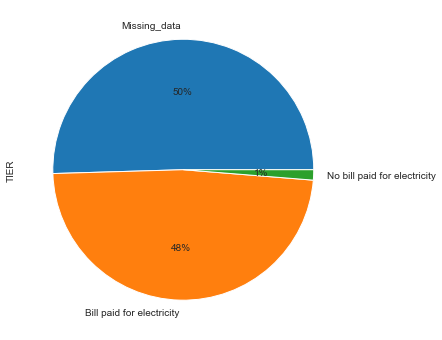

In [3195]:
df_f['TIER'].value_counts().plot.pie( autopct='%1.0f%%',figsize=(18,6))
ax[0].set_title('TIER levels based on reliability')

In the above graph we can see:

1. Only 1% lies in TIER 0-3 for not paying the electricity bill
2. 48% lies in TIER 4-5 for paying the electricity bill

# Attribute: Health and Safety

Methodology:

To understand the attribute more carefully, features from all the power sources have been taekn into consideration; 

* C41 represents the accidents caused using the national grid. 
* C83 represents the accidents caused using the mini grid.
* C112 represents the accidents caused using the generator set.
* C130 represents the accidents caused using the battery.
* C142 represents the accidents caused using the Pico-hydro.
* C175 represents the accidents caused using the solar based devices.

In [3196]:
df_hs= df[['C41','C83','C112','C130','C142','C175']]

In [3197]:
df_hs.columns = ['National_grid', 'Mini_grid','Generator_set','Battery','Pico_hydro','Solar_devices']

In [3198]:
df_hs.head()

,National_grid,Mini_grid,Generator_set,Battery,Pico_hydro,Solar_devices
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


### Focusing on National grid

In [3208]:
df_hs = df_hs.replace(np.nan, 'Missing_data', regex=True)

In [3209]:
def conditions(National_grid):
    if National_grid == 'Missing_data':
        return "Missing_data"
    elif National_grid=='Yes' :
        return "Serious accidents"
    else:
        return "No accidents"
    
func = np.vectorize(conditions)
transform = func(df_hs.National_grid)
df_hs["TIER"] = transform

In [3210]:
df_hs.head()

,National_grid,Mini_grid,Generator_set,Battery,Pico_hydro,Solar_devices,TIER
0,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data
1,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data
2,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data
3,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data
4,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data,Missing_data


### Visualizing the TIER levels 

Text(0.5, 1, 'TIER levels based on reliability')

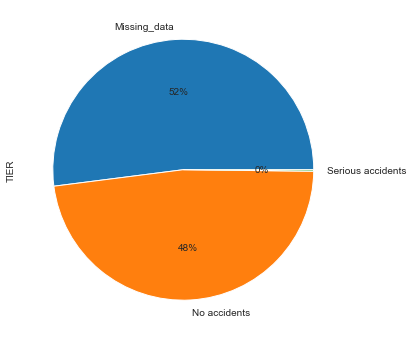

In [3211]:
df_hs['TIER'].value_counts().plot.pie( autopct='%1.0f%%',figsize=(18,6))
ax[0].set_title('TIER levels based on reliability')

In the above graph it can be seen that there are hardly any accidents caused by using electricity from the national grid.